K-Means Clustering Metrics:
Accuracy: 0.6487722676937892
Precision: 0.6590785169029444
Recall: 0.9206016755521707
F1 Score: 0.7681919288210994
Confusion Matrix:
[[ 555 2501]
 [ 417 4835]]


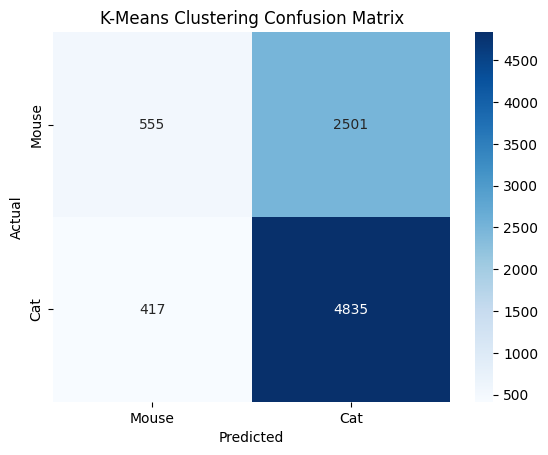


Cross-Validation Results:
KNN Accuracy: 1.0000 (±0.0000)
Random Forest Accuracy: 1.0000 (±0.0000)
Decision Tree Accuracy: 1.0000 (±0.0000)

KNN Metrics (Evaluated on Cluster Labels):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 972    0]
 [   0 7336]]

Random Forest Metrics (Evaluated on Cluster Labels):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 972    0]
 [   0 7336]]

Decision Tree Metrics (Evaluated on Cluster Labels):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 972    0]
 [   0 7336]]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specifica il percorso del file CSV
file_path = './simulation_data_BIG2.csv'

# Carica il dataset
data = pd.read_csv(file_path)

# Estrai le caratteristiche e le etichette
features = data[['x_position', 'y_position', 'last_movement_direction']]
labels = data['Agent_kind'].apply(lambda x: 1 if x == 'cat' else 0)

# Converti la caratteristica categoriale in numerica
features = pd.get_dummies(features, columns=['last_movement_direction'])

# Dividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardizza le caratteristiche
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Usa K-Means clustering per il training (senza etichette)
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 cluster per gatti e topi
kmeans.fit(X_train)  # Addestra il clustering sui dati di training

# Ottieni le etichette di cluster per i dati di training e test
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

# Valuta le prestazioni del clustering sui dati di test
# Confronta le etichette di cluster con le etichette vere (y_test)
clustering_accuracy = accuracy_score(y_test, test_cluster_labels)
clustering_precision = precision_score(y_test, test_cluster_labels)
clustering_recall = recall_score(y_test, test_cluster_labels)
clustering_f1 = f1_score(y_test, test_cluster_labels)
clustering_cm = confusion_matrix(y_test, test_cluster_labels)

# Stampa le metriche di valutazione per il clustering
print("K-Means Clustering Metrics:")
print(f"Accuracy: {clustering_accuracy}")
print(f"Precision: {clustering_precision}")
print(f"Recall: {clustering_recall}")
print(f"F1 Score: {clustering_f1}")
print("Confusion Matrix:")
print(clustering_cm)

# Visualizza la matrice di confusione per il clustering
sns.heatmap(clustering_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K-Means Clustering Confusion Matrix')
plt.show()

# Usa KNN, Random Forest e Decision Tree per valutare le prestazioni del clustering
# Addestra i modelli supervisionati sulle etichette di cluster (non sulle etichette vere)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Perform cross-validation for each model
knn_scores = cross_val_score(knn, X_train, train_cluster_labels, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf, X_train, train_cluster_labels, cv=5, scoring='accuracy')
dt_scores = cross_val_score(dt, X_train, train_cluster_labels, cv=5, scoring='accuracy')

# Print cross-validation results
print("\nCross-Validation Results:")
print(f"KNN Accuracy: {knn_scores.mean():.4f} (±{knn_scores.std():.4f})")
print(f"Random Forest Accuracy: {rf_scores.mean():.4f} (±{rf_scores.std():.4f})")
print(f"Decision Tree Accuracy: {dt_scores.mean():.4f} (±{dt_scores.std():.4f})")

# Addestra i modelli supervisionati usando le etichette di cluster come target
knn.fit(X_train, train_cluster_labels)
rf.fit(X_train, train_cluster_labels)
dt.fit(X_train, train_cluster_labels)

# Effettua le predizioni sui dati di test
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

# Funzione per valutare i modelli
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, cm

# Valuta i modelli supervisionati rispetto alle etichette di cluster
knn_metrics = evaluate_model(test_cluster_labels, knn_pred)
rf_metrics = evaluate_model(test_cluster_labels, rf_pred)
dt_metrics = evaluate_model(test_cluster_labels, dt_pred)

# Stampa le metriche di valutazione per ciascun modello
print("\nKNN Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {knn_metrics[0]}")
print(f"Precision: {knn_metrics[1]}")
print(f"Recall: {knn_metrics[2]}")
print(f"F1 Score: {knn_metrics[3]}")
print("Confusion Matrix:")
print(knn_metrics[4])

print("\nRandom Forest Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {rf_metrics[0]}")
print(f"Precision: {rf_metrics[1]}")
print(f"Recall: {rf_metrics[2]}")
print(f"F1 Score: {rf_metrics[3]}")
print("Confusion Matrix:")
print(rf_metrics[4])

print("\nDecision Tree Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {dt_metrics[0]}")
print(f"Precision: {dt_metrics[1]}")
print(f"Recall: {dt_metrics[2]}")
print(f"F1 Score: {dt_metrics[3]}")
print("Confusion Matrix:")
print(dt_metrics[4])



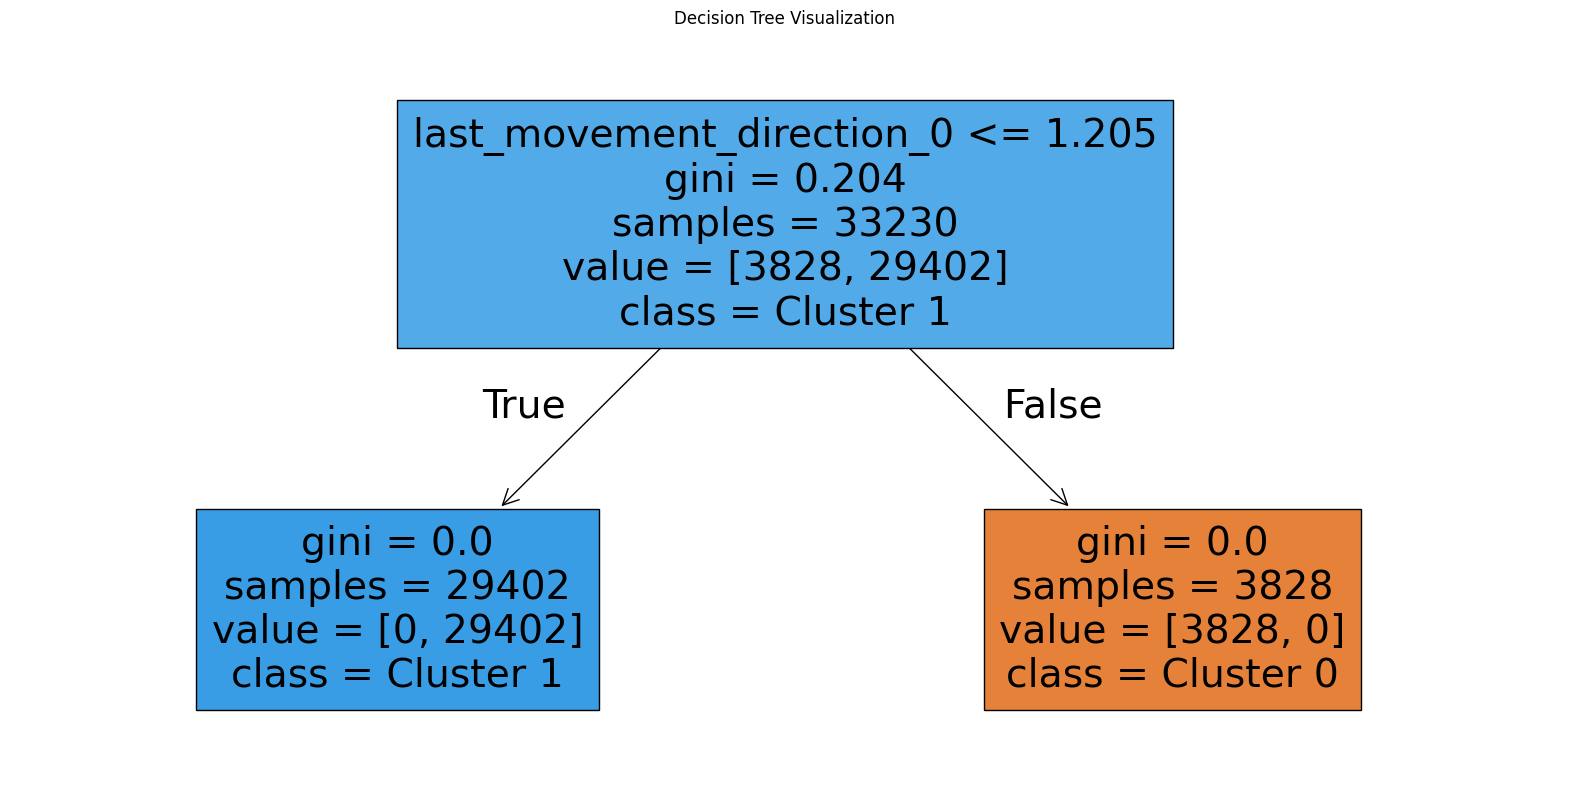

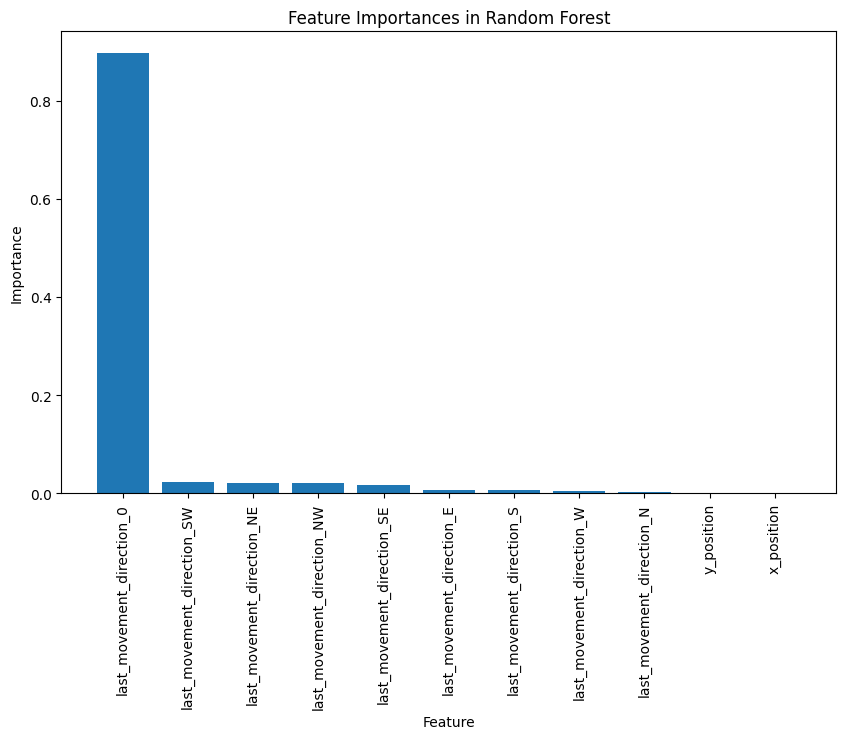

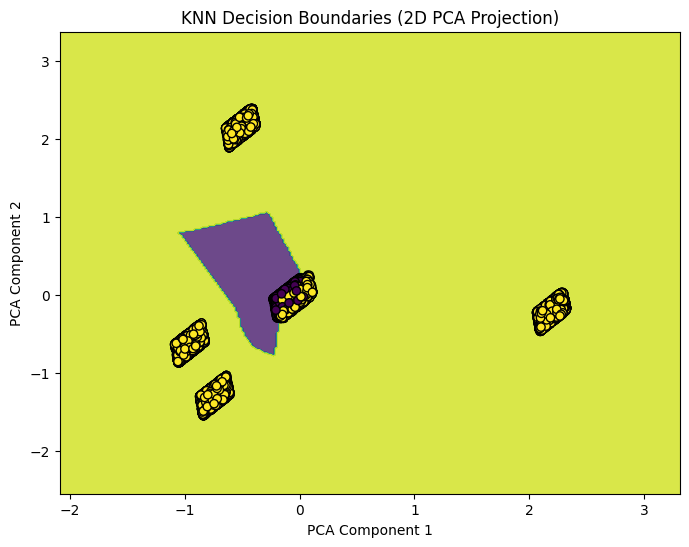

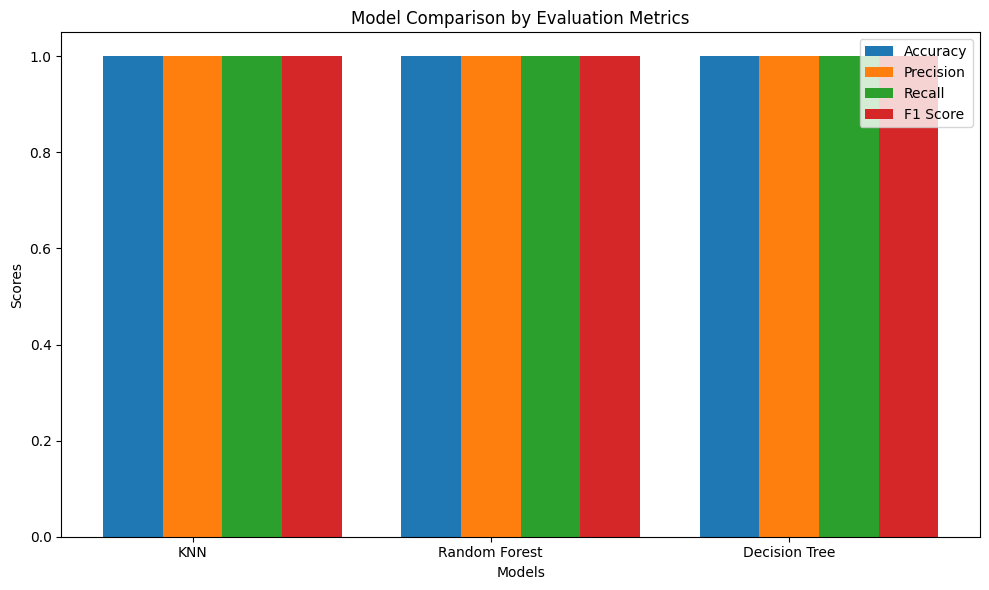

In [6]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=features.columns, class_names=["Cluster 0", "Cluster 1"])
plt.title("Decision Tree Visualization")
plt.show()

# Visualize Feature Importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Visualize KNN Decision Boundaries (Dimensionality Reduction for 2D)
from sklearn.decomposition import PCA

if X_train.shape[1] > 2:
    # Reduce to 2 dimensions using PCA
    pca = PCA(n_components=2)
    X_train_2D = pca.fit_transform(X_train)
    X_test_2D = pca.transform(X_test)
    knn.fit(X_train_2D, train_cluster_labels)  # Retrain KNN on reduced dimensions
    h = .02  # step size in the mesh
    x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
    y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=train_cluster_labels, edgecolor='k', marker='o')
    plt.title("KNN Decision Boundaries (2D PCA Projection)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Create a bar plot to compare the statistics of all three models
models = ['KNN', 'Random Forest', 'Decision Tree']
accuracy = [knn_metrics[0], rf_metrics[0], dt_metrics[0]]
precision = [knn_metrics[1], rf_metrics[1], dt_metrics[1]]
recall = [knn_metrics[2], rf_metrics[2], dt_metrics[2]]
f1 = [knn_metrics[3], rf_metrics[3], dt_metrics[3]]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision, width, label='Precision')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + 2*width, f1, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()